# Experiment Three
This is the third experiment using three convolutional layers + dropout and no augmentation.

In [1]:
# model training using tensorflow
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
0


In [4]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'train_data')

size = (224,224) # height, width

'''
Load the training data
'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 2700 files belonging to 2 classes.
Using 2160 files for training.


In [5]:
'''
Load the validation data
'''
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 2700 files belonging to 2 classes.
Using 540 files for validation.


In [6]:
# there are two classes
num_classes = 2

# normalize the input images
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

model = Sequential([
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [9]:
epochs=100

# stop when the validation loss does not improve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/100
68/68 [==============================] - 5s 80ms/step - loss: 0.7131 - accuracy: 0.5931 - val_loss: 0.5209 - val_accuracy: 0.7648
Epoch 2/100
68/68 [==============================] - 4s 65ms/step - loss: 0.4579 - accuracy: 0.7912 - val_loss: 0.3930 - val_accuracy: 0.8407
Epoch 3/100
68/68 [==============================] - 4s 64ms/step - loss: 0.3079 - accuracy: 0.8750 - val_loss: 0.3815 - val_accuracy: 0.8593
Epoch 4/100
68/68 [==============================] - 4s 65ms/step - loss: 0.1961 - accuracy: 0.9269 - val_loss: 0.3290 - val_accuracy: 0.8889
Epoch 5/100
68/68 [==============================] - 5s 67ms/step - loss: 0.1701 - accuracy: 0.9352 - val_loss: 0.3247 - val_accuracy: 0.8852
Epoch 6/100
68/68 [==============================] - 5s 72ms/step - loss: 0.1129 - accuracy: 0.9579 - val_loss: 0.3658 - val_accuracy: 0.9019
Epoch 7/100
68/68 [==============================] - 4s 61ms/step - loss: 0.0521 - accuracy: 0.9856 - val_loss: 0.3317 - val_accuracy: 0.9204
Epoch 

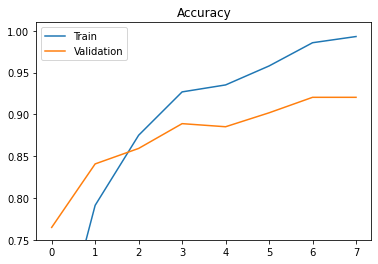

In [11]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label = "Train")
pyplot.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label = "Validation")
pyplot.ylim((0.75, 1.01))
pyplot.legend()
pyplot.show()

In [ ]:
model.save('models/experiment_003')